##  **Fish species classification using logistic regression**  ##

In [15]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
df=pd.read_csv('Fish.csv')

In [3]:
df

,Weight,Length1,Length2,Length3,Height,Width,Species
0,242.0,23.2,25.4,30.0,11.5200,4.0200,Bream
1,290.0,24.0,26.3,31.2,12.4800,4.3056,Bream
2,340.0,23.9,26.5,31.1,12.3778,4.6961,Bream
3,363.0,26.3,29.0,33.5,12.7300,4.4555,Bream
4,430.0,26.5,29.0,34.0,12.4440,5.1340,Bream
...,...,...,...,...,...,...,...
154,12.2,11.5,12.2,13.4,2.0904,1.3936,Smelt
155,13.4,11.7,12.4,13.5,2.4300,1.2690,Smelt
156,12.2,12.1,13.0,13.8,2.2770,1.2558,Smelt
157,19.7,13.2,14.3,15.2,2.8728,2.0672,Smelt


In [4]:
# number of Species
df['Species'].value_counts()

Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: Species, dtype: int64

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Weight   159 non-null    float64
 1   Length1  159 non-null    float64
 2   Length2  159 non-null    float64
 3   Length3  159 non-null    float64
 4   Height   159 non-null    float64
 5   Width    159 non-null    float64
 6   Species  159 non-null    object 
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [19]:
df.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [5]:
#seperate dependent and independent variables

X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [6]:
X


,Weight,Length1,Length2,Length3,Height,Width
0,242.0,23.2,25.4,30.0,11.5200,4.0200
1,290.0,24.0,26.3,31.2,12.4800,4.3056
2,340.0,23.9,26.5,31.1,12.3778,4.6961
3,363.0,26.3,29.0,33.5,12.7300,4.4555
4,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...
154,12.2,11.5,12.2,13.4,2.0904,1.3936
155,13.4,11.7,12.4,13.5,2.4300,1.2690
156,12.2,12.1,13.0,13.8,2.2770,1.2558
157,19.7,13.2,14.3,15.2,2.8728,2.0672


In [7]:
#Normalise the input since our attributes have different range of input values
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(X)
X_scaled = ss.transform(X)
X_scaled[:10]

array([[-0.43807217, -0.30578858, -0.28230301, -0.10602023,  0.59657867,
        -0.23652895],
       [-0.30356218, -0.22550724, -0.19805366, -0.00233668,  0.82126055,
        -0.06657895],
       [-0.16344761, -0.23554241, -0.17933159, -0.01097698,  0.79734129,
         0.16579317],
       [-0.09899491,  0.0053016 ,  0.05469437,  0.19639012,  0.87977146,
         0.022621  ],
       [ 0.08875862,  0.02537193,  0.05469437,  0.23959159,  0.81283498,
         0.42637127],
       [ 0.14480444,  0.05547743,  0.12022164,  0.30007366,  1.08395111,
         0.30343125],
       [ 0.28491901,  0.05547743,  0.12022164,  0.28279307,  1.21901769,
         0.51235788],
       [-0.02333304,  0.13575877,  0.14830475,  0.32599455,  0.86572884,
         0.16216328],
       [ 0.14480444,  0.13575877,  0.14830475,  0.33463485,  1.17815367,
         0.25368398],
       [ 0.28491901,  0.22607527,  0.21383202,  0.4296781 ,  1.23004114,
         0.32247327]])

In [8]:
#split our input data in to train and test data
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.3,random_state=0)

In [9]:
X_train[10]

array([-1.09184676, -1.55014928, -1.60220939, -1.60943167, -1.63661878,
       -1.86390733])

In [10]:
#apply logistic regression
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression(random_state=1).fit(X_train,y_train)
#we evaluate the correctness of the model by predicting the test dataset
new=classifier.predict(X_test)
new

array(['Bream', 'Roach', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch',
       'Pike', 'Bream', 'Perch', 'Pike', 'Pike', 'Perch', 'Perch',
       'Parkki', 'Perch', 'Perch', 'Pike', 'Perch', 'Bream', 'Parkki',
       'Perch', 'Perch', 'Pike', 'Parkki', 'Bream', 'Bream', 'Perch',
       'Perch', 'Smelt', 'Bream', 'Perch', 'Pike', 'Pike', 'Bream',
       'Perch', 'Perch', 'Bream', 'Perch', 'Perch', 'Perch', 'Perch',
       'Perch', 'Bream', 'Smelt', 'Perch', 'Perch', 'Perch'], dtype=object)

In [11]:
#our model score
score=accuracy_score(y_test,new)
score

0.8333333333333334

In [12]:
#create a pickle file
import pickle
pickle_out=open("classifier.pkl","wb")
pickle.dump(classifier,pickle_out)
pickle_out.close()

In [13]:
classifier.predict([[12,11.4,14.1,13.2,2.4,1.3]])

array(['Pike'], dtype=object)

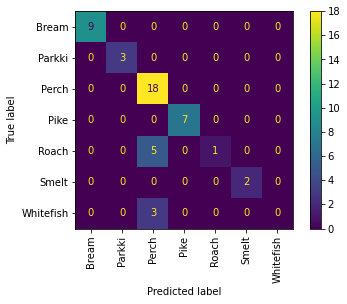

In [14]:
#plot confusion matrix to identify how many values are correctly and wrongly predicted
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
plot_confusion_matrix(classifier, X_test, y_test,xticks_rotation='vertical')  
plt.show()  

I tried different classification models like decision tree ,logistic regression,random forest but logistic regression performed well .Hence I am using logistic regression to launch my model in heroku